# Classical vs Quantum Bits


## Statevectors

#### In quantum physics we use **_Statevectors_** to describe the state of our system. Each element in the statevector contains the probability of finding the car in a certain place:

![statevector](./statevector.png)

#### We could also keep a statevector of all the possible state of a car like speed,color etc


## Qubit Notion

#### Classical bits are always either 0 or 1 at every point during a computation.

---

#### This restriction is lifted for quantum bits. Whether we get a 0 or a 1 from a qubit only needs to be well-defined when a measurement is made to extract an output. At that point, it must commit to one of these two options. At all other times, its state will be something more complex than can be captured by a simple binary value.

#### There exists a qubit state that is certain to output a 1 and output a 0 we call it 1 and 0 state respectively. There is no overlap. These two state are **_Linearly Independent_** means we can't form other with any linear combination of itself. These two state are also **_Orthogonal_**. We can represent these state with vectors

![01state](./01state.png)

#### Vectors, you can essentially just think of them as lists of numbers which we manipulate using certain rules.These rules make vectors well-suited for describing quantities with a magnitude and a direction.

#### We can write any state with the combination of

![01state](./01state.png)

#### Example

![anystate](./anystate.png)

### This state can be written as

![anystatederivation](./anystatederi.png)


## Orthonormal Bases

---

#### Two vectors  $\left. \middle | 0 \right\rangle$  and $\left. \middle | 1 \right\rangle$ are orthonormal, this means they are both **_Orthogonal_** and **_Normalised_**. Orthogonal means the vectors are at right angles:

![right-angle](./rightangle.png)

#### And **_Normalised_** means their magnitudes (length of the arrow) is equal to 1.

#### The two vectors $\left. \middle | 0 \right\rangle$ and $\left. \middle | 1 \right\rangle$ are linearly independent, which means we cannot describe $\left. \middle | 0 \right\rangle$ in terms of $\left. \middle | 1 \right\rangle$, and vice versa. However, using both the vectors $\left. \middle | 0 \right\rangle$ and $\left. \middle | 1 \right\rangle$, and our rules of addition and multiplication by scalars.

![orthonormal](./orthonormalbasis1.png)

#### Because the vectors **$\left. \middle | 0 \right\rangle$** and **$\left. \middle | 1 \right\rangle$** are linearly independent, and can be used to describe any vector in 2D space using vector addition and scalar multiplication, we say the vectors **$\left. \middle | 0 \right\rangle$** and **$\left. \middle | 1 \right\rangle$** form a **_Basis_**. In this case, since they are both **Orthogonal** and **Normalised**, we call it an **_Orthonormal Basis_**.

### We typically describe linear combinations such as this using the word **Superposition**.

#### **$\left. \middle | q_0 \right\rangle$** can be expressed as a superposition of **$\left. \middle | 0 \right\rangle$** and **$\left. \middle | 1 \right\rangle$** , it is no less a definite and well-defined qubit state than they are.


## Qubits with Qiskit


In [28]:
#  QuantumCircuit object to store our circuits
from qiskit import QuantumCircuit,Aer
from qiskit.visualization import plot_bloch_vector,plot_histogram
from math import sqrt,pi

### Initialize the Qubit State and save the state vector


In [29]:
# initial state |0>
qc=QuantumCircuit(1)
# initialize() method to initialize the qubit into anystate
initial_state=[0,1]
# Apply initialisation operation to the 0th qubit
qc.initialize(initial_state,0)
qc.save_statevector()
qc.draw()

┌─────────────────┐ statevector 
q: ┤ Initialize(0,1) ├──────░──────
   └─────────────────┘      ░

### Simulate our circuit


In [30]:
# To simulate
sim = Aer.get_backend('aer_simulator')
result=sim.run(qc).result()


### Get the state vector


In [31]:
# Display the output state vector

out_state=result.get_statevector()
counts=result.get_counts()
print(out_state)

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### Measure the result


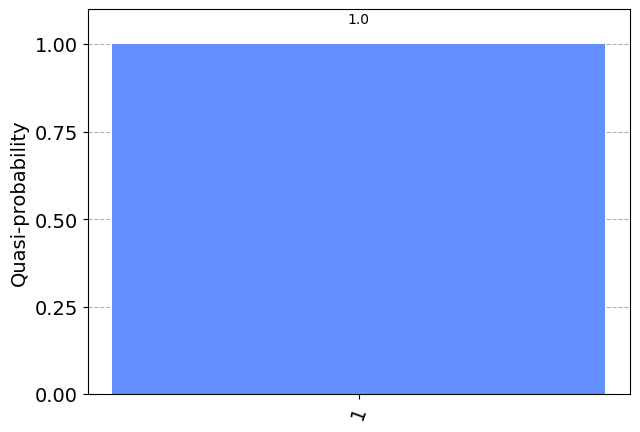

In [32]:
qc.measure_all()
qc.draw()
plot_histogram(counts)


### Put our Qubit into Superposition State


In [33]:
new_qc=QuantumCircuit(1)
initial_state=[1/sqrt(2),1j/sqrt(2)]
new_qc.initialize(initial_state,0)
new_qc.save_statevector()
new_qc.draw()


┌──────────────────────────────┐ statevector 
q: ┤ Initialize(0.70711,0.70711j) ├──────░──────
   └──────────────────────────────┘      ░

### Now Simulate


In [34]:
new_result=sim.run(new_qc).result()
new_output=new_result.get_statevector()
print(new_output)

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


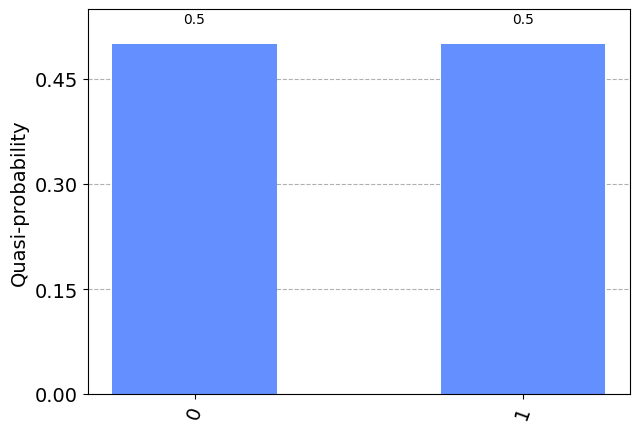

In [35]:
new_count=new_result.get_counts()
plot_histogram(new_count)

## The Rules of Measurement


### Rule of measurement

#### To find the probability of measuring a state $ \left | \psi \right\rangle $ in the state $\left | x \right\rangle $ we do p($\left |x \right\rangle $)= $ | \left\langle x \middle | \psi \right\rangle |^2 $

#### $\left\langle x \middle|\right.$ it's called **Bra** it's a **Row Vector** $\left . \middle | x \right\rangle$ it's the cat notation

<!-- $ \left\langle x \middle | $ -->

<!--
$ \left\langle \psi \middle| \phi \right\rangle $ -->


### Conjugate Transpose

#### Conversion between bra-ket takes places using the conjugate transpose method.

$\left. | a \right\rangle$=
$
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}
$

#### To get the conjugate transpose, the matrix is transposed and the elements are complex conjugated.

$ \left\langle a | \right. $=
$
\begin{bmatrix}
a^_\_0 & a^_\_1 \cdots &a^\*\_n
\end{bmatrix}
$


### Inner Product

#### The inner product is a generalisation of the dot product In this guide, we use the inner product between a bra (row vector) and a ket (column vector), and it follows this rule:

$\left. | a \right\rangle$=
$
\begin{bmatrix}
a_0 \\
a_1 \\
\vdots \\
a_n
\end{bmatrix}
$

#### To get the conjugate transpose, the matrix is transposed and the elements are complex conjugated.

$ \left\langle a | \right. $=
$
\begin{bmatrix}
a^_\_0 & a^_\_1 \cdots &a^\*\_n
\end{bmatrix}
$

$\left. | b \right\rangle$=
$
\begin{bmatrix}
b_0 \\
b_1 \\
\vdots \\
b_n
\end{bmatrix}
$

$\left\langle a | b \right\rangle$=$a^*_0b_0+a^*_1b_1+a^*_2b_2 \cdots a^*_nb_n$

#### Inner product of two vectors always gives us a **Scalar**. The inner product of two **Orthogonal vectors** is $0$

$\left\langle 1|0 \right\rangle$=
$
\begin{bmatrix}
0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$ = $0$

#### the vectors $\left. |0 \right\rangle$ and $\left. |1 \right\rangle$ are also normalised (magnitudes are equal to 1):

$\left\langle 0|0 \right\rangle$=
$
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
$ = $1$

$\left\langle 1|1 \right\rangle$=
$
\begin{bmatrix}
0 & 1
\end{bmatrix}
\begin{bmatrix}
0 \\
1
\end{bmatrix}
$ = $1$

#### In the equation above,$\left. |x \right\rangle$ can be any qubit state. To find the probability of measuring $\left. |0 \right\rangle$ , we take the inner product of $\left. |0 \right\rangle$ and the state we are measuring (in this case $\left. |\psi \right\rangle$ ), then square the magnitude.

#### If we look at the state $\left. |q_0 \right\rangle$ from before, we can see the probability of measuring $\left. |0 \right\rangle$ is indeed : $.5$

$\left. |q_0 \right\rangle$=$\frac{1}{\sqrt(2)}\left. |0 \right\rangle + \frac{\imath}{\sqrt(2)} \left. |1 \right\rangle $

$\left\langle 0 |q_0 \right\rangle = \frac{1}{\sqrt(2)}\left\langle 0 |0 \right\rangle + \frac{\imath}{\sqrt(2)}\left\langle 0 |1 \right\rangle $

$=\frac{1}{\sqrt(2)}.1 + \frac{\imath}{\sqrt(2)}.0$

$=\frac{1}{2}$

$| \left\langle 0 |q_0 \right\rangle|^2=\frac{1}{2}$

#### To measure Probability 1

$\left\langle 1 |q_0 \right\rangle = \frac{1}{\sqrt(2)}\left\langle 1 |0 \right\rangle + \frac{\imath}{\sqrt(2)}\left\langle 1 |1 \right\rangle $

$=\frac{1}{\sqrt(2)}.0 + \frac{\imath}{\sqrt(2)}.1$

$=\frac{1}{2}$

$| \left\langle 1 |q_0 \right\rangle|^2=\frac{1}{2}$


### Normalization

#### The rule shows us that amplitudes are related to probabilities. If we want the probabilities to add up to 1 (which they should!), we need to ensure that the statevector is properly normalized. Specifically, we need the magnitude of the state vector to be 1.

$\left\langle \psi | \psi \right\rangle =1$

$\left. | \psi \right\rangle= \alpha \left. | 0 \right\rangle + \beta \left. | 1 \right\rangle$

$|\alpha|^2+|\beta|^2=1$


### Quick Exercise


#### **Q1** Create a state vector that will give a probability of measuring $\left. |0 \right\rangle$.


In [56]:
qc_exer=QuantumCircuit(1)
initial_state=[1/sqrt(3),sqrt(2/3)]
qc_exer.initialize(initial_state,0)
qc_exer.save_statevector()
qc_exer.draw()

┌────────────────────────────┐ statevector 
q: ┤ Initialize(0.57735,0.8165) ├──────░──────
   └────────────────────────────┘      ░

In [57]:
results=sim.run(qc_exer).result()
state_exer=results.get_statevector()
print(state_exer)
# xx=results.get
# print(result.get_statevector())

Statevector([0.57735027+0.j, 0.81649658+0.j],
            dims=(2,))


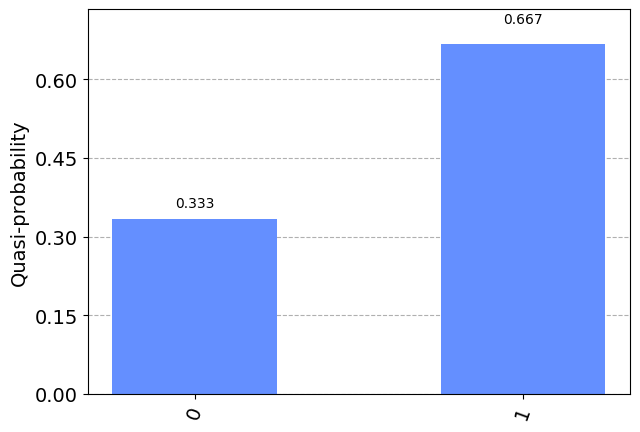

In [58]:
res_count=results.get_counts()
plot_histogram(res_count)

#### Q2 Create a different state vector that will give the same measurement probabilities.

#### Q3 Verify that the probability of measuring $\left. |1 \right\rangle$ for these two states is $\frac{2}{3}$ .


In [66]:
qc_exer1=QuantumCircuit(1)
initial_state=[sqrt(2/6)*1j,sqrt(4/6)*1j]
qc_exer1.initialize(initial_state,0)
qc_exer1.save_statevector()
qc_exer1.draw()


┌──────────────────────────────┐ statevector 
q: ┤ Initialize(0.57735j,0.8165j) ├──────░──────
   └──────────────────────────────┘      ░

In [67]:
results=sim.run(qc_exer1).result()
state_exer=results.get_statevector()
print(state_exer)   


Statevector([0.+0.57735027j, 0.+0.81649658j],
            dims=(2,))


0.6666666666666666


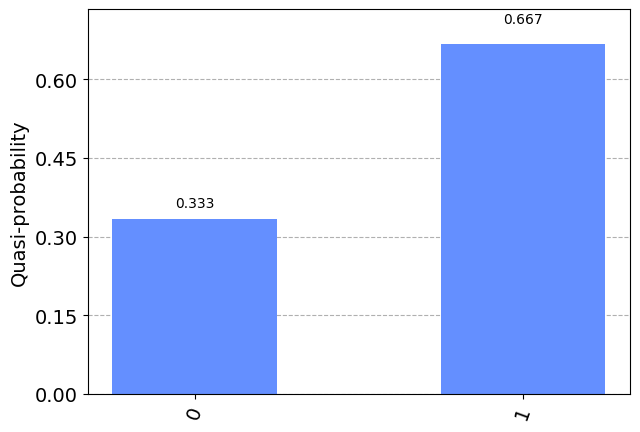

In [70]:
new_count=results.get_counts()
print(2/3)
plot_histogram(new_count)


In [72]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')